In [53]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 18

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [54]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (18, 100, 100, 1)
Label batch shape: (18, 10)


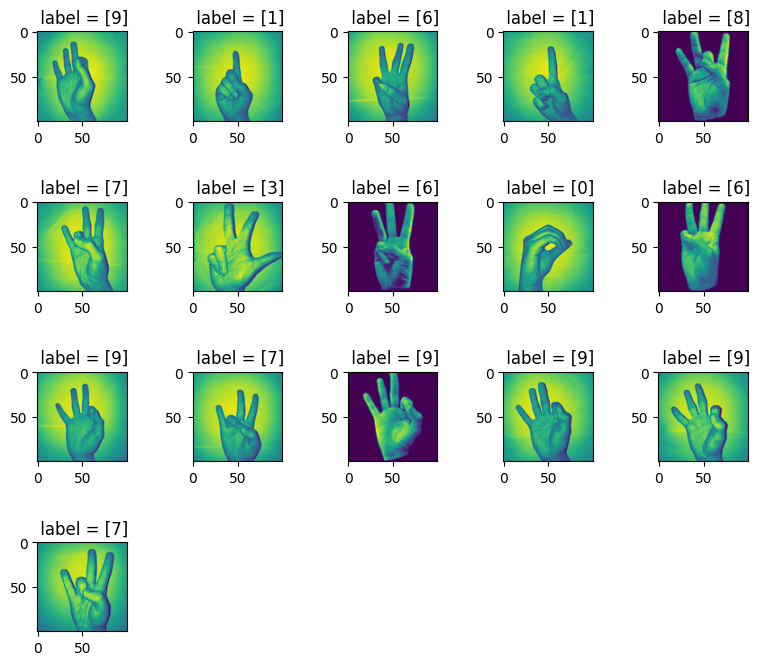

In [55]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 17):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [56]:
# Batch parameters

train_filenames = train_gen.filenames
train_count = len(train_filenames)

val_filenames = val_gen.filenames
val_count = len(val_filenames)

test_filenames = test_gen.filenames
test_count = len(test_filenames)

train_spe =  int(train_count / batch_size)
val_spe = int(val_count / batch_size)
test_spe = int(test_count / batch_size)

In [59]:
from keras import models, layers

np.random.seed(1)

network = models.Sequential()

network.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((3,3)))
network.add(layers.Conv2D(64, (4,4), activation='relu'))
network.add(layers.MaxPool2D((3,3)))
network.add(layers.Flatten())
network.add(layers.Dropout(rate=0.75))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 29, 29, 64)        32832     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 5184)              0         
                                                                 
 dropout_15 (Dropout)        (None, 5184)            

In [60]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = network.fit(train_gen,
                      steps_per_epoch=train_spe,
                      epochs=11,
                      validation_data=val_gen,
                      validation_steps=val_spe)

Epoch 1/11
107/107 [==============================] - 9s 75ms/step - loss: 1.5775 - accuracy: 0.4500 - val_loss: 0.7812 - val_accuracy: 0.7204
Epoch 2/11
107/107 [==============================] - 7s 68ms/step - loss: 0.7082 - accuracy: 0.7546 - val_loss: 0.4908 - val_accuracy: 0.8537
Epoch 3/11
107/107 [==============================] - 7s 69ms/step - loss: 0.4507 - accuracy: 0.8404 - val_loss: 0.4391 - val_accuracy: 0.8685
Epoch 4/11
107/107 [==============================] - 7s 68ms/step - loss: 0.3796 - accuracy: 0.8713 - val_loss: 0.3601 - val_accuracy: 0.8852
Epoch 5/11
107/107 [==============================] - 7s 68ms/step - loss: 0.3248 - accuracy: 0.8859 - val_loss: 0.3079 - val_accuracy: 0.9074
Epoch 6/11
107/107 [==============================] - 7s 68ms/step - loss: 0.2837 - accuracy: 0.9074 - val_loss: 0.2947 - val_accuracy: 0.9074
Epoch 7/11
107/107 [==============================] - 7s 68ms/step - loss: 0.2505 - accuracy: 0.9178 - val_loss: 0.2904 - val_accuracy: 0.9185

In [61]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.45002615451812744, 0.7545787692070007, 0.8403977155685425, 0.8712716102600098, 0.8859236240386963, 0.9073783159255981, 0.9178440570831299, 0.9309262037277222, 0.9382522106170654, 0.9403453469276428, 0.9471480846405029]

Validation Accuracy:
 [0.720370352268219, 0.8537036776542664, 0.8685185313224792, 0.885185182094574, 0.9074074029922485, 0.9074074029922485, 0.9185185432434082, 0.9351851940155029, 0.9259259104728699, 0.9351851940155029, 0.9333333373069763]

Train Loss:
 [1.5775034427642822, 0.7082024216651917, 0.4506939649581909, 0.3796209692955017, 0.32481616735458374, 0.28367510437965393, 0.250493586063385, 0.23180165886878967, 0.18936890363693237, 0.18664255738258362, 0.17211414873600006]

Validation Loss:
 [0.7811563014984131, 0.49083462357521057, 0.439119428396225, 0.360073059797287, 0.30787256360054016, 0.2947157025337219, 0.2904464900493622, 0.2486266791820526, 0.2877216935157776, 0.2737058401107788, 0.25946125388145447]


In [66]:
test_loss, test_accuracy = network.evaluate(test_gen, steps=test_spe)

15/15 [==============================] - 0s 13ms/step - loss: 0.1924 - accuracy: 0.9444


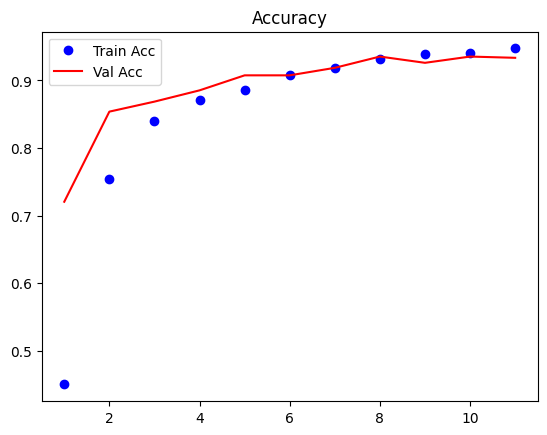

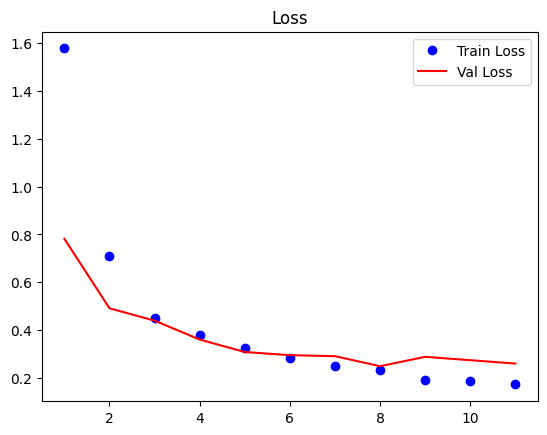

In [67]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 131ms/step


First layer feature maps:


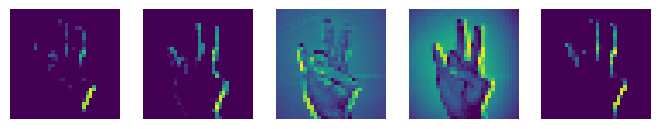

1/1 [==============================] - 0s 53ms/step


Second layer feature maps:


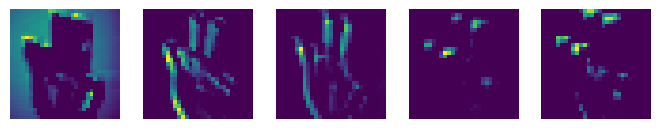

In [38]:
# Visualising the CNN

layer_output = network.layers[1].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nFirst layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()

layer_output = network.layers[2].output

# Create a new model that returns the output of the first convolutional layer
temp_model = models.Model(inputs=network.input, outputs=layer_output)

# Get the feature maps of the first convolutional layer
feature_maps = temp_model.predict(data_batch)

# Plot the feature maps
print("\n\nSecond layer feature maps:")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i])
    plt.axis('off')
plt.show()